# Finite differences Error

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

sigma_t1= Matrix([-8.000000000000007,  1.410000000000059, 0.7853981633974483,                  0,                  1,                  0])
sigma   = Matrix([-7.999999999999158,  1.594922242058657, 0.6366868897904746,                  0,                  1,                  0])

M  = Matrix(np.diag([2,2,2, 20,20,200]))
invS = Matrix(np.diag([1,1,1,1,1, 0.01]))

# collision point w.r.t rigid body
r0 = Matrix([-1, 0])

def R(x):
    return Matrix([[cos(x), -sin(x)], [sin(x), cos(x)]])

eps = 3.906250e-04

In [2]:
# physics part of the functional
def f(sigma_k):
    diff = (sigma_k - sigma_t1)
    fx = (0.5 * diff.transpose() @ invS.transpose() @ M @ invS @ diff)
    assert(fx.shape[0] == fx.shape[1] == 1)
    # this is only accurate for the first 3 entries
    return fx[0,0]

In [3]:
# barrier part of the functional
phi = lambda x,eps: -1 + 1/(3*x/eps - 3*x**2/eps**2 + x**3/eps**3)
def distance(sigma_k):
    qk = invS * sigma_k
    uk = R(sigma_k[2]) @ r0 + Matrix(sigma_k[0:2])
    # TODO: this is assuming the bottom edge is flat, so only the first 
    # 3 entries of the gradient are correct, but the other ones are fixed anyway (0)
    return uk[1] - sigma_k[4]

def g(sigma_k):
    d = distance(sigma_k)
    return phi(d, eps)

In [4]:
# our variables
var_sigma = symbols("x1, y1, rtheta1, x2, y2, rtheta2")
subs = dict()
for i, var in enumerate(var_sigma):
    subs[var] = sigma[i]

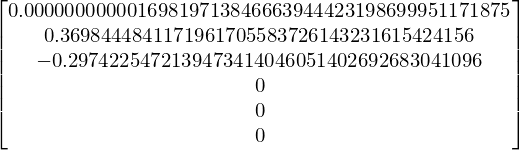

In [33]:
# to validate against what I see in the code
grad_f = Matrix([diff(f( Matrix(var_sigma)), xi) for xi in var_sigma])
grad_f.subs(subs)


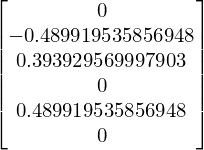

In [6]:
# to validate against what I see in the code
grad_g = Matrix([diff(g( Matrix(var_sigma)), xi) for xi in var_sigma])
grad_g.subs(subs)

In [7]:
free_grad = (grad_f.subs(subs) + grad_g.subs(subs))
free_grad[3] = 0 # fix dofs
free_grad[4] = 0
free_grad[5] = 0

In [8]:
# direction from the code
dir_x = np.array([-1.698197138466639e-12,     0.1200549392679577,   -0.09649084609034725,                      0,                      0,                      0])
dir_x = dir_x[:,np.newaxis]

In [23]:
fx0 = f(sigma) + g(sigma) # value we want to beat.
x = np.geomspace(1e-30, .1,500) # sampling


<IPython.core.display.Javascript object>


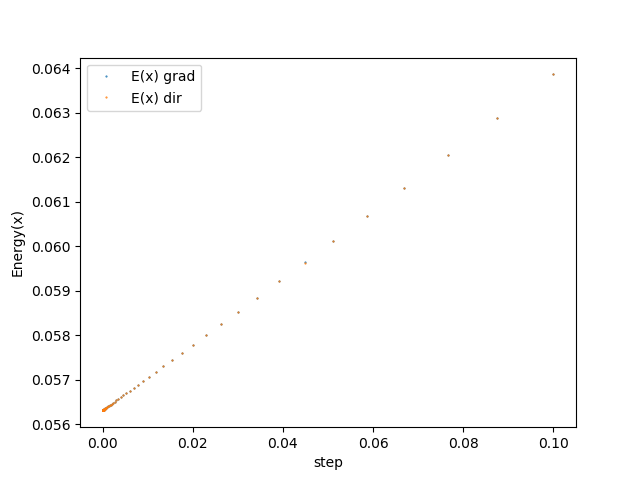

In [14]:

# visualize physics part
fx = np.array([f(sigma - xi * free_grad) for xi in x])
fx_code = np.array([f(sigma + xi * dir_x) for xi in x])

fig, ax = plt.subplots()
plt.plot(x,fx, label='E(x) grad', linestyle = 'None', marker='o', markersize=0.5)
plt.plot(x,fx_code, label='E(x) dir', linestyle = 'None', marker='o', markersize=0.5)
plt.xlabel('step')
plt.ylabel('Energy(x)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


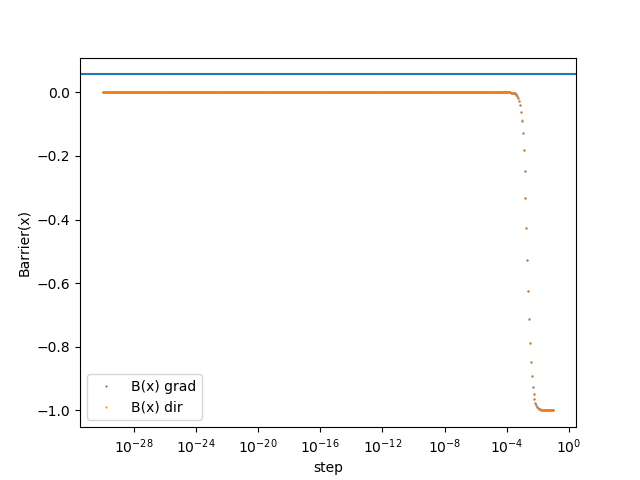

In [24]:
# visualize barrier part
gx = np.array([g(sigma - xi * free_grad) for xi in x])
gx_code = np.array([g(sigma + xi * dir_x) for xi in x])

fig, ax = plt.subplots()
plt.plot(x,gx, label='B(x) grad', linestyle = 'None', marker='o', markersize=0.5)
plt.plot(x,gx_code, label='B(x) dir', linestyle = 'None', marker='o', markersize=0.5)
plt.axhline(y=fx0)
plt.xscale('log')
plt.xlabel('step')
plt.ylabel('Barrier(x)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


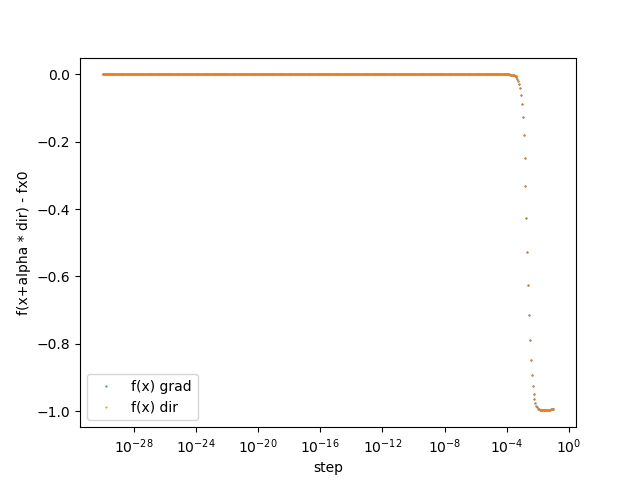

In [27]:
# visualize combined difference
fig, ax = plt.subplots()
plt.plot(x,  (gx + fx) - fx0, label='f(x) grad', linestyle = 'None', marker='o', markersize=0.5)
plt.plot(x,  (gx_code + fx_code) - fx0, label='f(x) dir', linestyle = 'None', marker='o', markersize=0.5)
plt.xlabel('step')
plt.xscale('log')
plt.ylabel('f(x+alpha * dir) - fx0')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


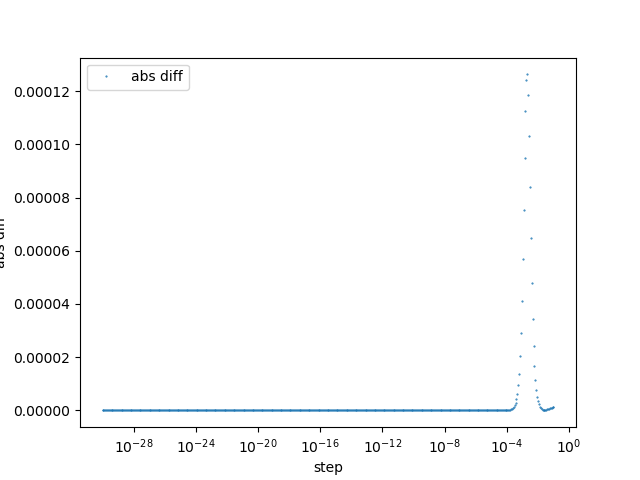

In [31]:
# visualize combined difference
fig, ax = plt.subplots()
plt.plot(x, np.abs((gx + fx) - (gx_code + fx_code)), label='abs diff', linestyle = 'None', marker='o', markersize=0.5)
plt.xlabel('step')
plt.xscale('log')
plt.ylabel('abs diff')
plt.legend()
plt.show()